# OUTLIER

In [1]:
#outlier is far away far data 
#outlier:Outliers are those data points that are significantly different from the rest of the dataset. 
#They are often abnormal observations that skew the data distribution,
#and arise due to inconsistent data entry, or erroneous observations.
#only for columnwise and numerical column
#2 methods handle outlier 1>drop 2>impute
#impute is having 2 method -:1>SD (standard deviation)-Gaussian distribution
#2>IQR-skew data

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
data1=pd.read_excel(r"C:\Users\Admin\Documents\GitHub\edu-python\LungCap.xls")
data1

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [4]:
data1.shape

(725, 6)

In [5]:
data1.describe()

,LungCap(cc),Age( years),Height(inches)
count,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276
std,2.662008,4.004750,7.202144
min,0.507000,3.000000,45.300000
25%,6.150000,9.000000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.800000,15.000000,70.300000
max,14.675000,19.000000,81.800000


In [6]:
data1.isnull().sum()

LungCap(cc)       0
Age( years)       0
Height(inches)    0
Smoke             0
Gender            0
Caesarean         0
dtype: int64

In [7]:
data1.dtypes

LungCap(cc)       float64
Age( years)         int64
Height(inches)    float64
Smoke              object
Gender             object
Caesarean          object
dtype: object

In [8]:
data1.Smoke.value_counts()

no     648
yes     77
Name: Smoke, dtype: int64

In [9]:
data1.Smoke.replace({"no":0,"yes":1},inplace=True)

In [10]:
data1.Smoke.value_counts()

0    648
1     77
Name: Smoke, dtype: int64

In [11]:
data1.dtypes

LungCap(cc)       float64
Age( years)         int64
Height(inches)    float64
Smoke               int64
Gender             object
Caesarean          object
dtype: object

In [12]:
data1.Gender.value_counts()

male      367
female    358
Name: Gender, dtype: int64

In [13]:
data1.Gender.replace({"male":0,"female":1},inplace=True)

In [14]:
data1.Gender.value_counts()

0    367
1    358
Name: Gender, dtype: int64

In [15]:
data1.dtypes

LungCap(cc)       float64
Age( years)         int64
Height(inches)    float64
Smoke               int64
Gender              int64
Caesarean          object
dtype: object

In [16]:
data1.Caesarean.value_counts()

no     561
yes    164
Name: Caesarean, dtype: int64

In [17]:
data1.Caesarean.replace({"no":0,"yes":1},inplace=True)

In [18]:
data1.Caesarean.value_counts()

0    561
1    164
Name: Caesarean, dtype: int64

In [19]:
data1.dtypes

LungCap(cc)       float64
Age( years)         int64
Height(inches)    float64
Smoke               int64
Gender              int64
Caesarean           int64
dtype: object

In [20]:
data1_cor=data1.corr()
data1_cor

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
LungCap(cc),1.000000,0.819675,0.912187,0.101374,-0.169823,0.021317
Age( years),0.819675,1.000000,0.835737,0.211232,0.030312,0.056339
Height(inches),0.912187,0.835737,1.000000,0.176534,-0.141441,0.060397
Smoke,0.101374,0.211232,0.176534,1.000000,0.053528,0.038330
Gender,-0.169823,0.030312,-0.141441,0.053528,1.000000,-0.013070
Caesarean,0.021317,0.056339,0.060397,0.038330,-0.013070,1.000000


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

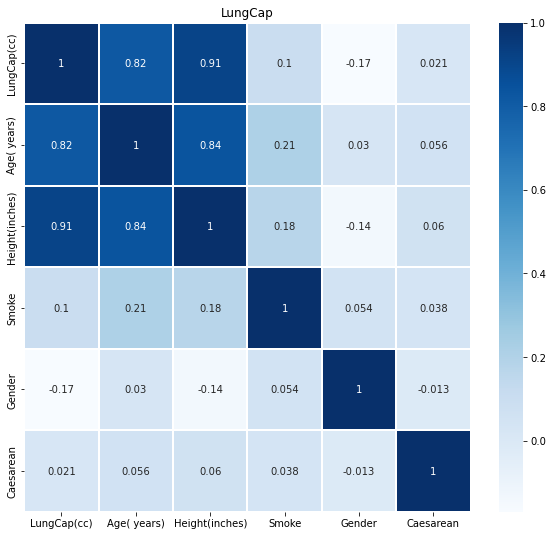

In [30]:
plt.figure(figsize=(10,9))
heatmap=sns.heatmap(data1_cor,linewidth=2,annot=True,cmap=plt.cm.Blues)
plt.title("LungCap")
plt.show()

In [23]:
#Age and LC has 2nd highest ve correlation 
#Height and LC has highest +ve correlation 
#LC and Caesarean has Lowest correlation compared to other columns

In [24]:
#1Method
outliers=[]
def detect_outliers(var):
    threshold=3
    mean=np.mean(var)
    std=np.std(var)
    
    for i in var:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
        return outliers

In [29]:
out=detect_outliers(LC)
out

NameError: name 'LC' is not defined